In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [94]:
%%time 
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

CPU times: user 4.73 ms, sys: 2.88 ms, total: 7.61 ms
Wall time: 10.2 ms


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train_data.shape

(891, 12)

In [7]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

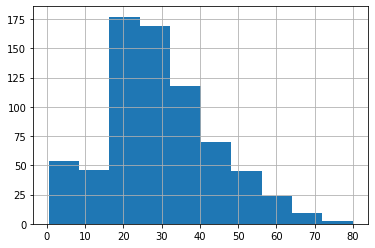

In [9]:
train_data.Age.hist()

In [10]:
import seaborn as sns


<AxesSubplot:xlabel='Sex', ylabel='count'>

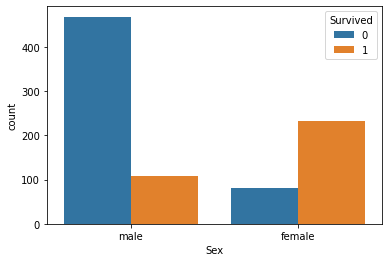

In [11]:
sns.countplot(x="Sex", hue="Survived", data=train_data)

So to conclude from above plot:
* majority of male are NOT survived
* majority of female are survived
* male are greater than female


<AxesSubplot:>

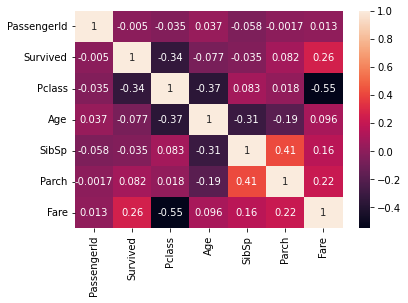

In [12]:
sns.heatmap(data=train_data.corr(), annot=True )

Let\`s observe heatmap
* Low correlations are between Survived and [Fare & Pclass]
* Zero correlations are between Survived and [Age, SibSp, PassengerId and Parch]
* Age & Pclass has normal negative correlation which means that Pclass are devived into Age category
* Fare & Pclass also have normolized negative correlation which is probably means relationship
* Parch and SibSp have normal positive correlation value
* PassengerId does not have any high or low correlation with other feature -> so we drop PassenderId


Tose correlation results tell us that Zero correlation features should be eliminated.
However, Age i think must stay for modelling.

In [21]:
train_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.00,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.00,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.00,C148,C
890,891,3,"Dooley, Mr. Patrick",1,32.0,0,0,370376,7.75,NaN,Q


In [95]:
df = train_data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
sex_bin = {"female": 0,
           "male": 1}
df['Sex'] = df['Sex'].map(sex_bin)


In [97]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df.groupby(df.Age.isnull())["Name"].head()

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
17                         Williams, Mr. Charles Eugene
19                              Masselmani, Mrs. Fatima
26                              Emir, Mr. Farred Chehab
28                        O'Dwyer, Miss. Ellen "Nellie"
Name: Name, dtype: object

In [40]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [68]:
df.Pclass.unique()


AttributeError: 'str' object has no attribute 'unique'

In [77]:
df.loc[(df.Age.isnull()) & (df.Embarked == 'S')].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 17 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  90 non-null     int64  
 1   Survived     90 non-null     int64  
 2   Pclass       90 non-null     int64  
 3   Name         90 non-null     object 
 4   Sex          90 non-null     int64  
 5   Age          0 non-null      float64
 6   SibSp        90 non-null     int64  
 7   Parch        90 non-null     int64  
 8   Ticket       90 non-null     object 
 9   Fare         90 non-null     float64
 10  Cabin        13 non-null     object 
 11  Embarked     90 non-null     object 
dtypes: float64(2), int64(6), object(4)
memory usage: 9.1+ KB


In [78]:
df.loc[(df.Age.isnull()) & (df.Embarked == 'Q')].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 5 to 828
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  49 non-null     int64  
 1   Survived     49 non-null     int64  
 2   Pclass       49 non-null     int64  
 3   Name         49 non-null     object 
 4   Sex          49 non-null     int64  
 5   Age          0 non-null      float64
 6   SibSp        49 non-null     int64  
 7   Parch        49 non-null     int64  
 8   Ticket       49 non-null     object 
 9   Fare         49 non-null     float64
 10  Cabin        2 non-null      object 
 11  Embarked     49 non-null     object 
dtypes: float64(2), int64(6), object(4)
memory usage: 5.0+ KB


In [76]:
df.loc[(df.Age.isnull()) & (df.Embarked == 'C')].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 19 to 859
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  38 non-null     int64  
 1   Survived     38 non-null     int64  
 2   Pclass       38 non-null     int64  
 3   Name         38 non-null     object 
 4   Sex          38 non-null     int64  
 5   Age          0 non-null      float64
 6   SibSp        38 non-null     int64  
 7   Parch        38 non-null     int64  
 8   Ticket       38 non-null     object 
 9   Fare         38 non-null     float64
 10  Cabin        4 non-null      object 
 11  Embarked     38 non-null     object 
dtypes: float64(2), int64(6), object(4)
memory usage: 3.9+ KB


In [87]:
df.Name[0].split()

['Braund,', 'Mr.', 'Owen', 'Harris']

In [91]:
df.loc[( df.Name for i in range(len(df.Name)) if "Mr." == df.Name[i].split() )] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


* Age column has many missing values 
* Cabin column also has many missing values 
* Embarked column has 2 missing values
Now i should replace missing value to reallistic values:


In [120]:
y_train = df.Survived
X_train = df.drop("Survived", axis=1)


In [121]:
X_train = X_train.drop(["Ticket", "Cabin"], axis=1)

In [122]:
X_train = X_train.drop(["PassengerId"], axis=1)

In [123]:
X_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S
4,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S


,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
38,3,"Vander Planke, Miss. Augusta Maria",0,18.00,2,0,18.0000,S
48,3,"Samaan, Mr. Youssef",1,NaN,2,0,21.6792,C
69,3,"Kink, Mr. Vincenz",1,26.00,2,0,8.6625,S
104,3,"Gustafsson, Mr. Anders Vilhelm",1,37.00,2,0,7.9250,S
120,2,"Hickman, Mr. Stanley George",1,21.00,2,0,73.5000,S
147,3,"Ford, Miss. Robina Maggie ""Ruby""",0,9.00,2,2,34.3750,S
183,2,"Becker, Master. Richard F",1,1.00,2,1,39.0000,S
245,1,"Minahan, Dr. William Edward",1,44.00,2,0,90.0000,Q
301,3,"McCoy, Mr. Bernard",1,NaN,2,0,23.2500,Q
311,1,"Ryerson, Miss. Emily Borie",0,18.00,2,2,262.3750,C


<AxesSubplot:xlabel='Parch', ylabel='count'>

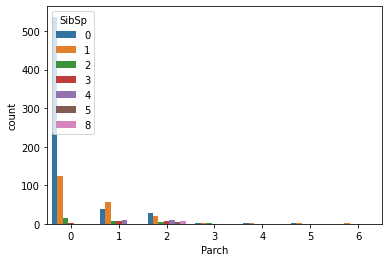

In [107]:
sns.countplot(x="Parch", hue="SibSp", data=X_train)

In [134]:
X_train.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [158]:

X_train.Age.fillna(X_train.Age.mean(), inplace=True)

In [160]:
X_train.Embarked.fillna("S", inplace=True)

In [161]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [162]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = pd.get_dummies(X_train[features], drop_first=True)

In [163]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,1
1,1,0,38.0,1,0,71.2833,0,0
2,3,0,26.0,0,0,7.9250,0,1
3,1,0,35.0,1,0,53.1000,0,1
4,3,1,35.0,0,0,8.0500,0,1


In [184]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model',  RandomForestClassifier(n_estimators=100, max_depth=5, random_state=7))
                             ])







In [185]:
scores = -1 * cross_val_score(my_pipeline, X, y_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')

In [189]:
my_pipeline.fit(X, y_train)

Pipeline(steps=[('preprocessor', SimpleImputer()),
                ('model', RandomForestClassifier(max_depth=5, random_state=7))])

In [192]:
test = pd.read_csv("/kaggle/input/titanic/test.csv")

In [168]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [170]:
test.drop(["PassengerId", "Name", "Cabin", "Ticket"],axis=1, inplace=True)

In [171]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [172]:
test.Age.fillna(test.Age.mean(), inplace=True)

In [173]:
test.Fare.fillna(test.Fare.mean(), inplace=True)

In [177]:
sex_bin = {"female": 0,
           "male": 1}
test['Sex'] = test['Sex'].map(sex_bin)

In [180]:
X_test = pd.get_dummies(test, drop_first=True)

In [181]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,1,0
1,3,0,47.0,1,0,7.0000,0,1
2,2,1,62.0,0,0,9.6875,1,0
3,3,1,27.0,0,0,8.6625,0,1
4,3,0,22.0,1,1,12.2875,0,1


In [190]:
preds = my_pipeline.predict(X_test)

In [191]:
preds

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

Prediction is Done!

Big part of my task was replcaing missing values 
I must update Age and Ebarked coumns again with more clear algorythm of replacing missing values
I used mean() for Age 
for Embarked I chose "S" because it was the most popular 


In [194]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': preds})
output.to_csv('submission.csv', index=False)

In [183]:
from sklearn.metrics import accuracy_score
